**Import Libraries :**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


**Load All Datasets :**

In [2]:
smokers = pd.read_csv("smokers.csv")
prescriptions = pd.read_csv("prescriptions.csv")
admissions = pd.read_csv("admissions.csv")
fatalities = pd.read_csv("fatalities.csv")
metrics = pd.read_csv("metrics.csv")

**Checking the Datasets :**

In [3]:
print("Smokers :")
print("\n")
display(smokers.head())
print("\n")

print("Prescriptions :")
print("\n")
display(prescriptions.head())
print("\n")

print("Admissions :")
print("\n")
display(admissions.head())
print("\n")

print("Fatalities :")
display(fatalities.head())
print("\n")

print("Metrics :")
print("\n")
display(metrics.head())
print("\n")


Smokers :




,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27




Prescriptions :




,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0




Admissions :




,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157




Fatalities :


,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101




Metrics :




,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8


**Merge All Datasets** :

In [4]:
admissions['Year'] = admissions['Year'].astype(str).str[:4].astype(int)
prescriptions['Year'] = prescriptions['Year'].astype(str).str[:4].astype(int)

df = smokers.merge(admissions, on="Year") \
            .merge(prescriptions, on="Year") \
            .merge(fatalities, on="Year") \
            .merge(metrics, on="Year")

df.head()

,Year,Method,Sex_x,16 and Over,16-24,25-34,35-49,50-59,60 and Over,ICD10 Code_x,...,Sex,Value_y,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2004,Weighted,NaN,25,29,31,29,24,14,All codes,...,NaN,469186,654.6,279.3,234.4,188.7,80.5,15375.0,772164.0,2.0
1,2004,Weighted,NaN,25,29,31,29,24,14,All codes,...,NaN,289408,654.6,279.3,234.4,188.7,80.5,15375.0,772164.0,2.0
2,2004,Weighted,NaN,25,29,31,29,24,14,All codes,...,NaN,127787,654.6,279.3,234.4,188.7,80.5,15375.0,772164.0,2.0
3,2004,Weighted,NaN,25,29,31,29,24,14,All codes,...,NaN,64718,654.6,279.3,234.4,188.7,80.5,15375.0,772164.0,2.0
4,2004,Weighted,NaN,25,29,31,29,24,14,All codes,...,NaN,177334,654.6,279.3,234.4,188.7,80.5,15375.0,772164.0,2.0


**Handle Missing Values :**

In [5]:
df.info()
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991683 entries, 0 to 991682
Data columns (total 37 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Year                                                         991683 non-null  int64  
 1   Method                                                       991683 non-null  object 
 2   Sex_x                                                        661122 non-null  object 
 3   16 and Over                                                  991683 non-null  int64  
 4   16-24                                                        991683 non-null  int64  
 5   25-34                                                        991683 non-null  int64  
 6   35-49                                                        991683 non-null  int64  
 7   50-59                                                        9916

**Exploratory Data Analysis (EDA) :**

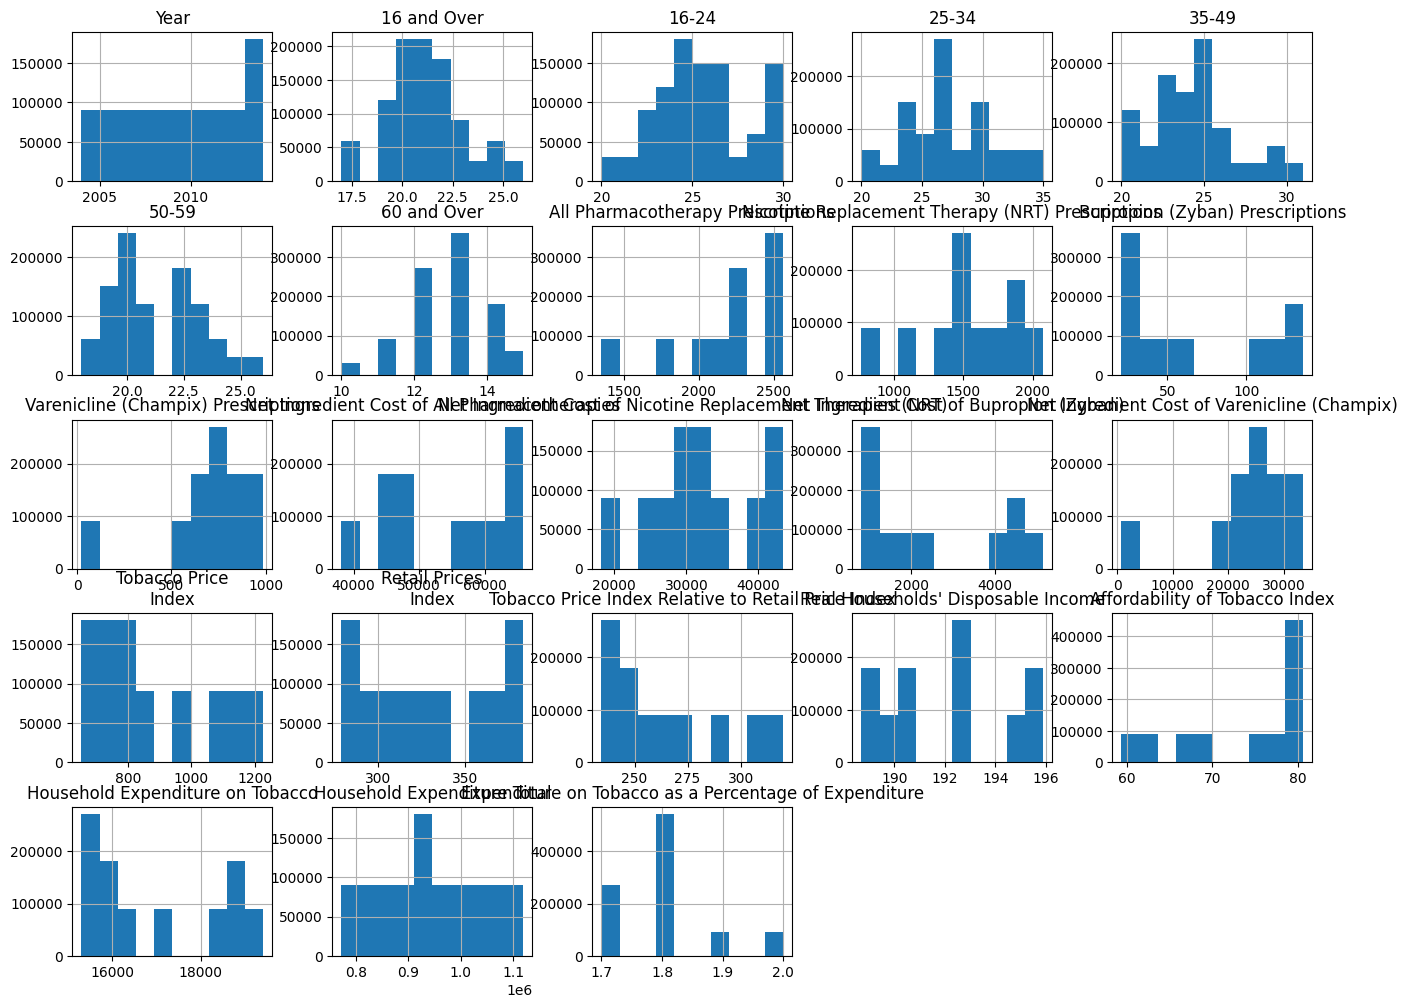

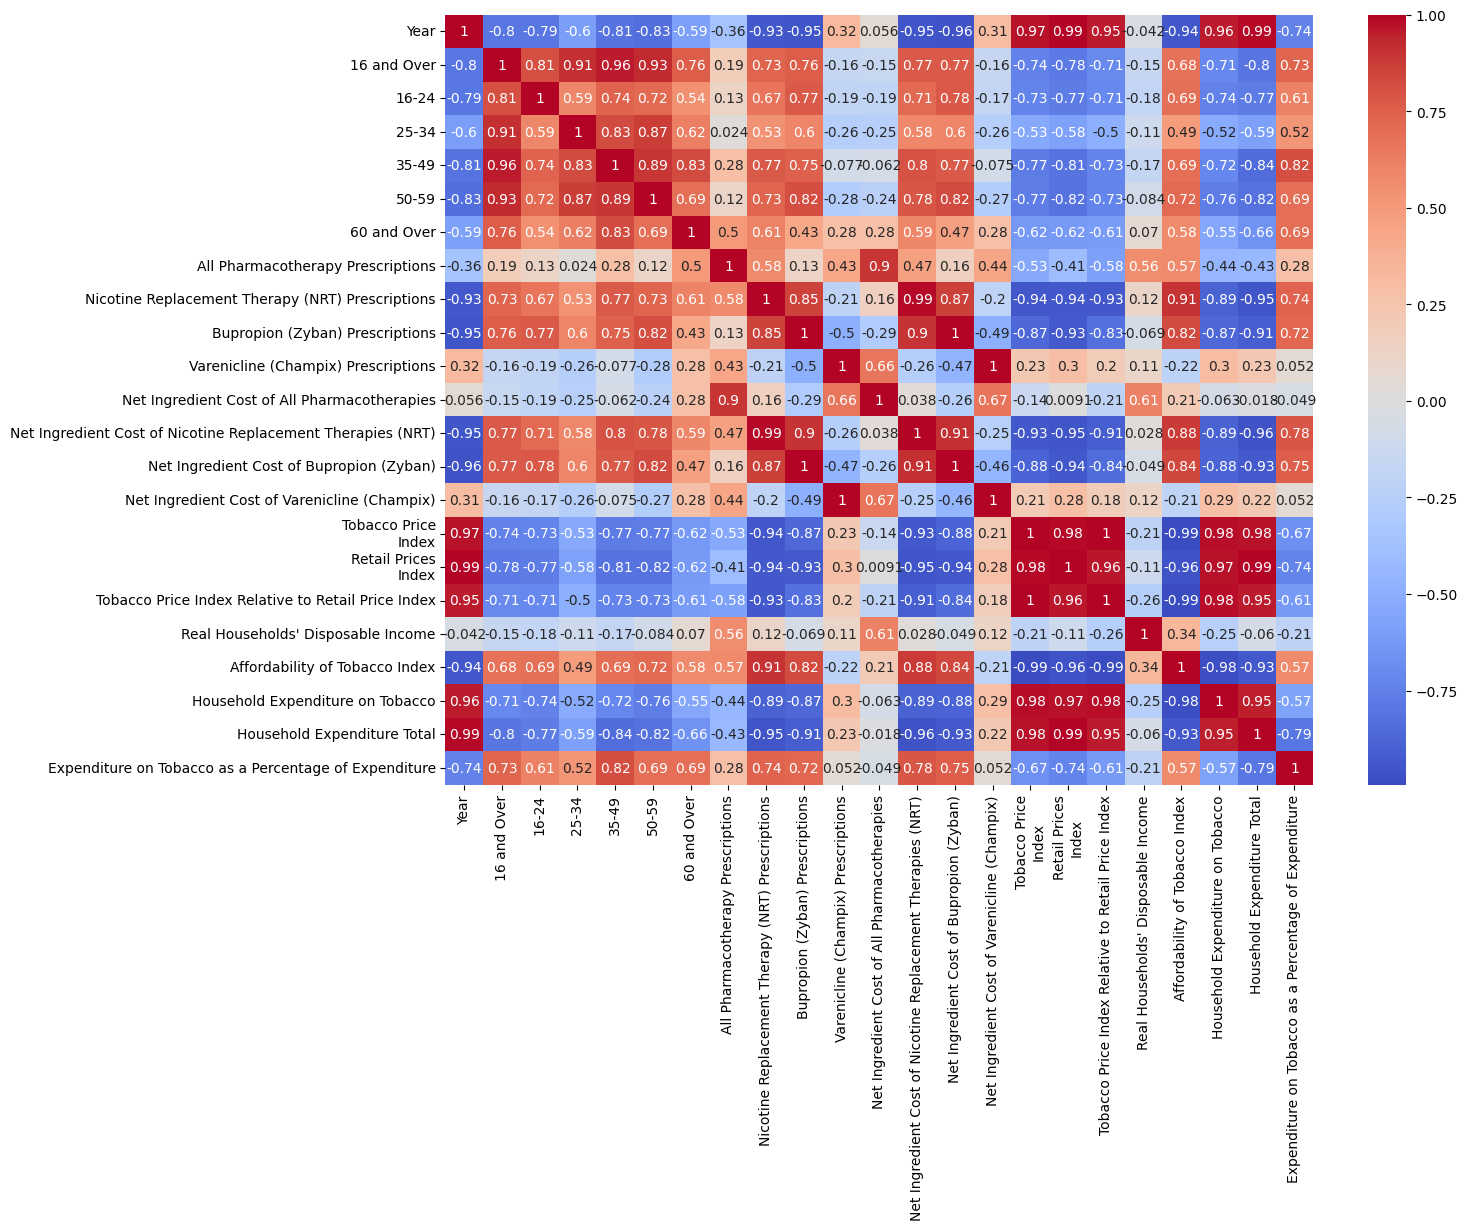

In [6]:
# Histograms
df.hist(figsize=(16,12))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

**Target Variable Creation :**

In [7]:
df['Value_y'] = pd.to_numeric(df['Value_y'], errors='coerce')
df['Mortality'] = (df['Value_y'] > df['Value_y'].median()).astype(int)

**Feature & Target Split :**

In [8]:
X = df.drop(['Mortality'], axis=1)
y = df['Mortality']

**Train–Test Split & Scaling :**

In [9]:
X_numeric = X.select_dtypes(include=np.number)
X_numeric.fillna(X_numeric.mean(), inplace=True) # Fill NaNs in the numeric subset of X

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression Model :**

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Evaluation
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))


Logistic Regression Results
Accuracy: 0.8949263122866636
Precision: 0.9728514527282947
Recall: 0.8104883858227642
F1 Score: 0.8842787970325618


**Random Forest Model :**

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))


Random Forest Results
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Confusion Matrix :**

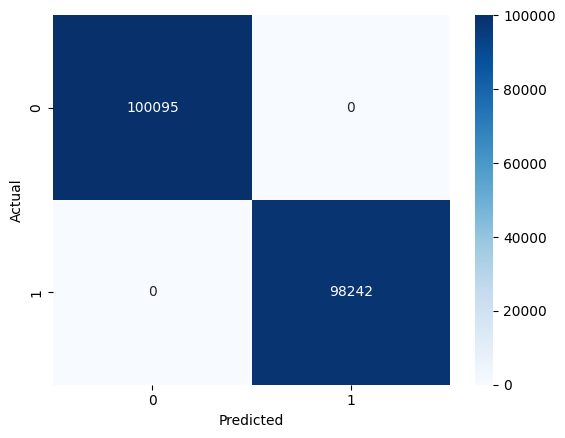

In [12]:
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance (Random Forest) :**

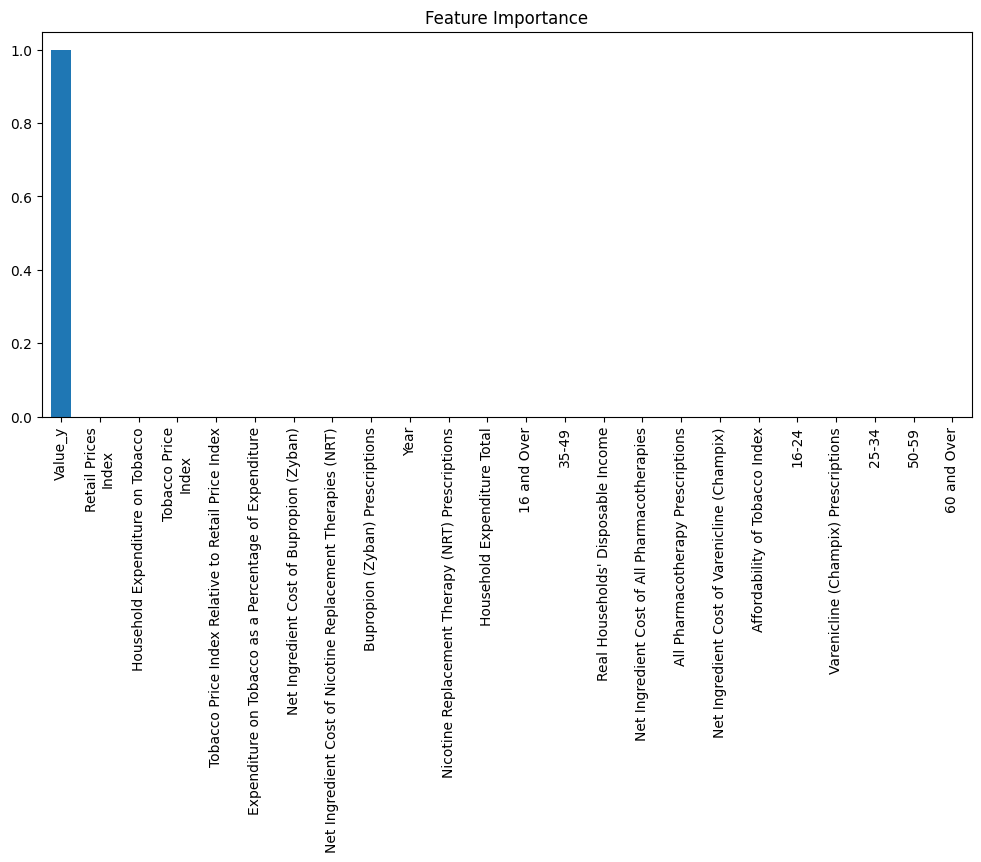

In [13]:
importance = pd.Series(rf.feature_importances_, index=X_numeric.columns)
importance.sort_values(ascending=False).plot(kind="bar", figsize=(12,5))
plt.title("Feature Importance")
plt.show()

**Final Conclusion :**

### Conclusion
- Smoking-related metrics strongly influence mortality
- Random Forest performed better than Logistic Regression
- Deaths, Admissions, and Prescriptions are key predictors

### Future Scope
- Add SHAP explainability
- Deploy using Flask / Streamlit
- Use real patient-level data